In [4]:
%matplotlib inline  
# from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl # this module controls the default values for plotting in matplotlib

In [5]:
def read_transcript_means_variances(filename,header,logscale):
    # compute and store the mean expression levels for each targetID
    meanExpressionLevels = [] 
    varExpressionLevels = [] 
    rpkm_file = open(filename)
    firstLine = True
    for line in rpkm_file:
        if header == True:
            if firstLine:
                firstLine = False
                continue
        if header == True:
            expLevels = np.array(line.split('\t')[4:]).astype(np.float)
        else:
            expLevels = [float(i)  for i in line.split('\t')]  
        if logscale == True:
            expLevels = [np.log10(x + 1) for x in expLevels]
        meanExpressionLevels.append(sum(expLevels))
        varExpressionLevels.append(np.var(expLevels))
    rpkm_file.close()

    return [meanExpressionLevels,varExpressionLevels]

In [6]:
def summarize_expLevels(values):
    series = pd.Series(values)
    print series.describe()

def plot_histogram(ax,values,xLabel):
    # plotting
    n, bins, patches = ax.hist(values, 50, normed=1, facecolor='green', alpha=0.75)
    ax.set_xlabel(xLabel)
    ax.set_ylabel('fraction of transcripts')
    # plt.title(filename)
    # plt.axis([0, 1e+06, 0, 20])
    # ax.grid(True)

def plot_multiple(values1,labels1,values2,labels2):
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
    plot_histogram(ax1,values1,labels1)
    plot_histogram(ax2,values2,labels2)

In [7]:
def write_array_to_file(array,filename):
    outfile = open(filename,"w")
    for item in array:
        outfile.write("%f\n" % item)
    outfile.close()
    
def read_array_from_file(filename):
    array = []
    infile = open(filename,"r")
    for line in infile:
        array.append(float(line))
    infile.close()
    return array

# Plot transcript means and variations on a small test dataset

In [95]:
filename = '../data/tissue_test.txt' 
[mean,variance] = read_transcript_means_variances(filename,header=False,logscale=True)

In [158]:
#summarize_expLevels(mean)

In [159]:
#summarize_expLevels(variance,'variance of log expression')

# Plot transcript means and variations on GO filtered dataset

In [100]:
pfx = '../../local_data/transcript_rpkm_in_go'
[mean,variance] = read_transcript_means_variances(pfx + '.txt' ,header=True,logscale=True)
write_array_to_file(mean, pfx + '_mean.txt' )
write_array_to_file(variance, pfx + '_variance.txt' )

count    67344.000000
mean      2463.170595
std       3644.616683
min          0.000000
25%         45.109037
50%        622.294049
75%       3620.869979
max      36513.195274
dtype: float64


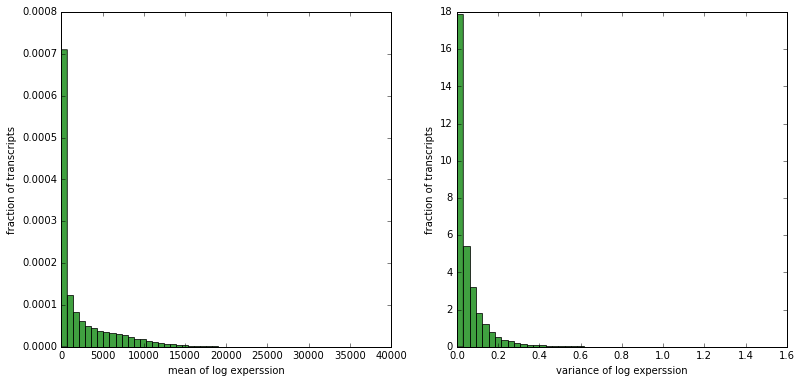

In [8]:
meanValues = read_array_from_file('../../local_data/transcript_rpkm_in_go_mean.txt')
varianceValues = read_array_from_file('../../local_data/transcript_rpkm_in_go_variance.txt')
mpl.rcParams['figure.figsize'] = (13, 6)
plot_multiple(meanValues,'mean of log experssion',varianceValues,'variance of log experssion')
summarize_expLevels(meanValues)

In [28]:
numberOfZeroMeanTranscripts = 0
for value in meanValues:
    if value <= 0.0001:
        numberOfZeroMeanTranscripts = numberOfZeroMeanTranscripts + 1
print 'Total Number of Transcripts:         ' , len(meanValues)
print 'Number of Zero Mean Transcripts:     ' , numberOfZeroMeanTranscripts

numberOfZeroVarTranscripts = 0
for value in varianceValues:
    if value <= 1e-9:
        numberOfZeroVarTranscripts = numberOfZeroVarTranscripts + 1

print 'Number of LOW Variance Transcripts:  ', numberOfZeroVarTranscripts


Total Number of Transcripts:          67344
Number of Zero Mean Transcripts:      2915
Number of LOW Variance Transcripts:   3269


# Plot transcript means and variations on variance-filtered dataset

In [156]:
pfx = '../../local_data/transcript_rpkm_top_10000_var'

In [124]:
[mean,variance] = read_transcript_means_variances(pfx + '.txt' ,header=True,logscale=True)
write_array_to_file(mean, pfx + '_mean.txt' )
write_array_to_file(variance, pfx + '_variance.txt' )

count    10000.000000
mean      7823.202609
std       4997.594483
min         43.400580
25%       3524.388597
50%       7828.966721
75%      11203.674237
max      36513.195274
dtype: float64


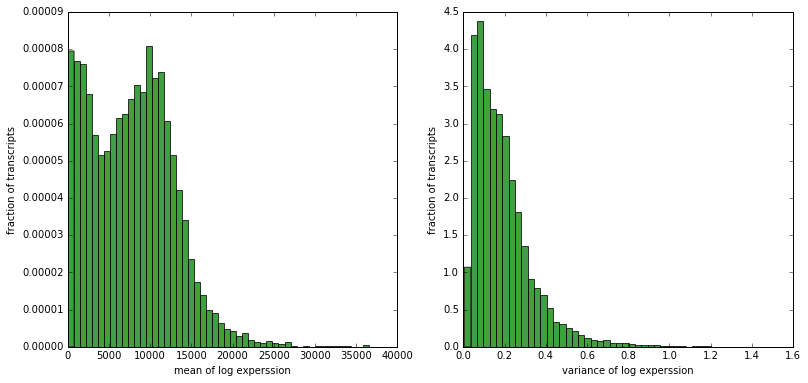

In [157]:
meanValues = read_array_from_file( pfx + '_mean.txt' )
varianceValues = read_array_from_file(pfx + '_variance.txt')
mpl.rcParams['figure.figsize'] = (13, 6)
plot_multiple(meanValues,'mean of log experssion',varianceValues,'variance of log experssion')
summarize_expLevels(meanValues)